In [1]:
import pandas as pd
import numpy as np
import sys
import statsmodels.api as sm
import statsmodels.formula.api as smf
#pd.set_option('display.width', 5000) 
#pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

pd.options.mode.chained_assignment = None  # default='warn'

my_dpi=72

print('This is loaded')

This is loaded


In [2]:
#base = pd.read_csv('rc15csv/pai2015before.csv', thousands=",", index_col='schid')
base = pd.read_csv('rc15csv/tim2015data.csv', thousands=",", index_col='schid')
base.shape

(4094, 54)

In [3]:
elemval = ['CHARTER NET','CHARTER NET SCH','CHARTER HIGH SCH+','CHARTER NET HIGH SCH+','HIGH SCHOOL+']
elembase = base[~base.schooltype.isin(elemval)]
elembase.shape

(3997, 54)

In [4]:
elembase.head(3)

,schid15,value,distid,districtname,county,schooltype,lowinc2014,me2014schoolisat,me2014districtisat,me2014stateisat,...,lowinc2015,act2015school,actscore2015district,actscore2015state,zelemscore2015,avgelem2015,stdvelem2015,zhsscore2015,avghs2015,stdvhs2015
schid,,,,,,,,,,,,,,,,,,,,,
030110040261001,030110040261001,"Edinburg Jr High School, Edinburg",030110040260000,Edinburg CUSD 4,Christian,MIDDLE SCHL,9.4,NaN,41.9,58.7,...,50.0,NaN,16.9,20.5,-1.14,29.8,9.61,NaN,NaN,NaN
56099207U262005,56099207U262005,"Peotone Intermediate Center, Frankfort",56099207U260000,Peotone CUSD 207U,Will,ELEMENTARY,5.2,65.1,66.9,58.7,...,25.1,NaN,21.0,20.5,-1.51,48.6,12.72,NaN,NaN,NaN
340490560022003,340490560022003,"River Trail School, Gurnee",340490560020000,Gurnee SD 56,Lake,ELEMENTARY,9.9,67.6,53.8,58.7,...,16.7,NaN,NaN,20.5,-0.63,53.4,12.40,NaN,NaN,NaN


In [5]:
elemval = ['']
elembase = elembase[~elembase.zelemscore2015.isin(elemval)]
elembase.shape

(3997, 54)

In [6]:
elembase['MEapp'] = elembase['me2015schoolELEM'] + elembase['me2015schAPP']
elembase.shape

(3997, 55)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     5529.
Date:                Tue, 15 Dec 2015   Prob (F-statistic):               0.00
Time:                        14:15:59   Log-Likelihood:                -10951.
No. Observations:                2906   AIC:                         2.191e+04
Df Residuals:                    2904   BIC:                         2.192e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     89.0869      0.421    211.379      0.000        88.260    89.913
x             -0.4991      0.007    -74.359      0.000        -0.512    -0.486
==============================================================================
Omnibus:                       50.144   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.471
Skew:                          -0.020   Prob(JB):                     4.14e-22
Kurtosis:                       3.901   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

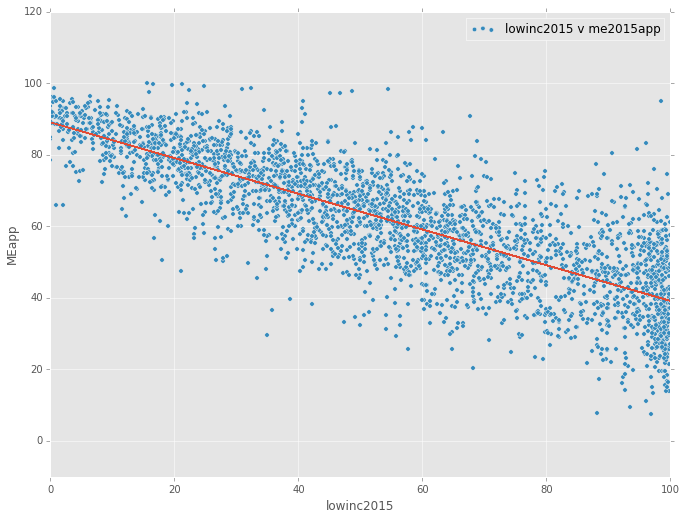

In [7]:
x = elembase['lowinc2015']
y = elembase['MEapp']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=elembase).fit()

elembase.plot(kind='scatter', x='lowinc2015', y='MEapp',label="lowinc2015 v me2015app", figsize=(800/my_dpi, 600/my_dpi))
plt.ylim(-10, 120)
plt.xlim(0, 100)
plt.legend()

# plots the trendline

plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 1.783e+04
Date:                Tue, 15 Dec 2015   Prob (F-statistic):               0.00
Time:                        14:16:18   Log-Likelihood:                -9176.8
No. Observations:                2780   AIC:                         1.836e+04
Df Residuals:                    2778   BIC:                         1.837e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.1131      0.432     14.138      0.000         5.265     6.961
x              0.9520      0.007    133.514      0.000         0.938     0.966
==============================================================================
Omnibus:                      110.954   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.870
Skew:                          -0.165   Prob(JB):                     2.54e-64
Kurtosis:                       4.555   Cond. No.                         211.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

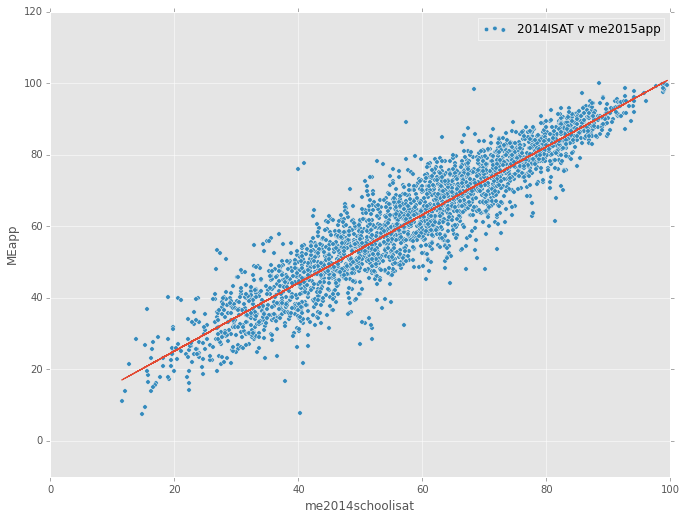

In [8]:

# different way, assign x and y

x = elembase['me2014schoolisat']
y = elembase['MEapp']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=elembase).fit()

elembase.plot(kind='scatter', x='me2014schoolisat', y='MEapp',label="2014ISAT v me2015app", figsize=(800/my_dpi, 600/my_dpi))
plt.ylim(-10, 120)
plt.xlim(0, 100)
plt.legend()

# plots the trendline

plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     36.01
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           2.16e-09
Time:                        14:16:42   Log-Likelihood:                -11439.
No. Observations:                3522   AIC:                         2.288e+04
Df Residuals:                    3520   BIC:                         2.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     29.5532      0.227    130.386      0.000        29.109    29.998
x             -0.0221      0.004     -6.001      0.000        -0.029    -0.015
==============================================================================
Omnibus:                      270.140   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.120
Skew:                          -0.610   Prob(JB):                     6.49e-89
Kurtosis:                       4.131   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

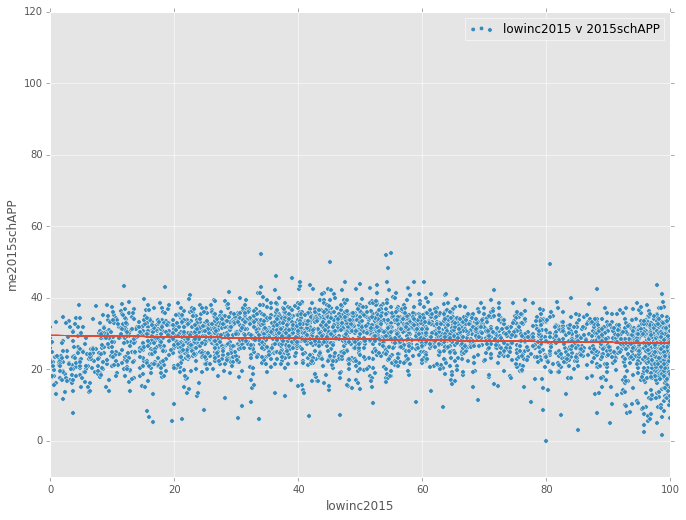

In [10]:
x = elembase['lowinc2015']
y = elembase['me2015schAPP']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=elembase).fit()

elembase.plot(kind='scatter', x='lowinc2015', y='me2015schAPP',label="lowinc2015 v 2015schAPP", figsize=(800/my_dpi, 600/my_dpi))
plt.ylim(-10, 120)
plt.xlim(0, 100)
plt.legend()

# plots the trendline

plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     49.62
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           2.32e-12
Time:                        14:17:02   Log-Likelihood:                -9121.2
No. Observations:                2906   AIC:                         1.825e+04
Df Residuals:                    2904   BIC:                         1.826e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     30.1482      0.217    139.215      0.000        29.724    30.573
x             -0.0412      0.006     -7.044      0.000        -0.053    -0.030
==============================================================================
Omnibus:                      144.187   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.622
Skew:                          -0.453   Prob(JB):                     1.36e-45
Kurtosis:                       3.942   Cond. No.                         77.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

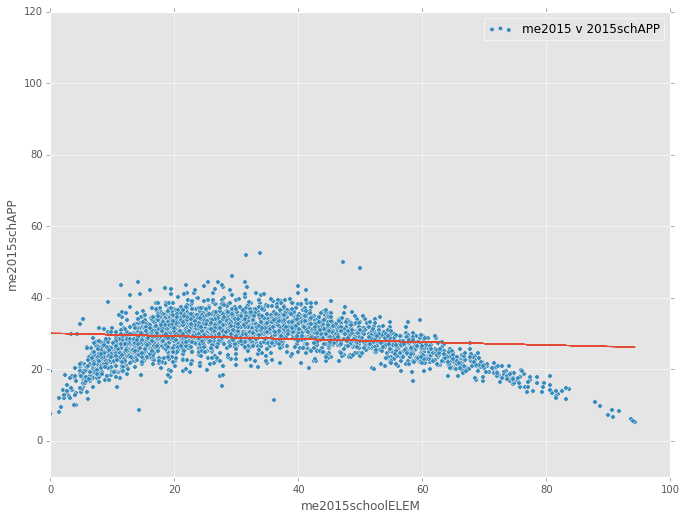

In [12]:
x = elembase['me2015schoolELEM']
y = elembase['me2015schAPP']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=elembase).fit()

elembase.plot(kind='scatter', x='me2015schoolELEM', y='me2015schAPP',label="me2015 v 2015schAPP", figsize=(800/my_dpi, 600/my_dpi))
plt.ylim(-10, 120)
plt.xlim(0, 100)
plt.legend()

# plots the trendline

plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()